>## <b> Evaluation Project 6:Loan Application Status Prediction </b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

__Loan Application Status Prediction__

__Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.__

***Independent Variables:***

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

***Dependent Variable (Target Variable):***

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

## Now we are importing required liabaries

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('loan_prediction.csv')

In [4]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Here in the given dataset we have 614 No. of Rows and 13 No. of Columns**

**Here some features are categorical and some features are numerical, we will check in further investivagation**



- Loan_ID : Its contained Unique Loan ID number

- Gender : Male/ Female

- Married : Here information contained about Applicant relationship status as married or not married (Y/N)

- Dependents : Here Number of family members or count which are dependent on applicant financially

- Education : Applicant Education (Graduate/ Under Graduate)

- Self_Employed : Its about the occupation information of applicant as Self employed or not  (Y/N)

- ApplicantIncome : Its clrealy implies about Applicant  monthly income/earnings

- CoapplicantIncome : Its contains Coapplicant  monthly income/earning details

- LoanAmount : Loan amount in thousands of dollars

- Loan_Amount_Term : Its means Loan take duration in months

- Credit_History : Its for checking the credit worthiness of applicant

- Property_Area : If loan taken against property or for purchasing any property that falls in which area i.e rural/ Urban/metro city etc

- Loan_Status : Its name cleary states that its Loan application accepted or rejected. 

## Now we will do Exploratory Data Analysis

- 1.  Data Integrity check

Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [7]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

Dataset doesnot contain Any duplicate entry. So, we can proceed further to investigate the data.

- 2.Datatype Check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- <b> Comment </b>:
    - In loan application status dataset we have 614 rows with 13 columns including target variable.
    - A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
    - Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
    - There are three types of datatype dtypes: float64(4), int64(1), object(8)

In [9]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)


number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


- 3.Missing value check

<AxesSubplot:>

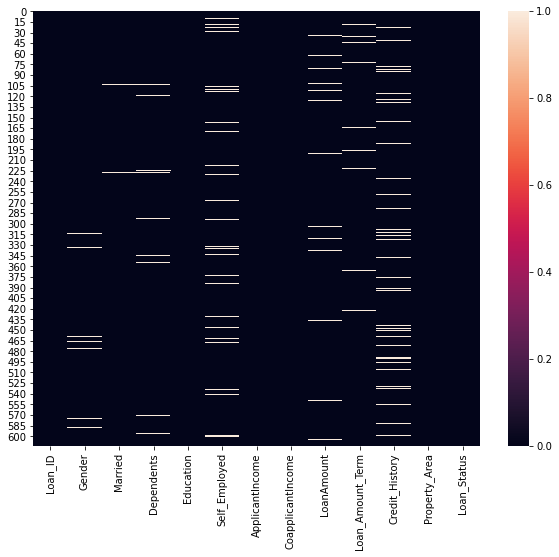

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


- <b> Comment :</b>
    - 7 out 13 columns contains missing value.
    - As small amount of data is missing so we use mean amd mode to replace with NaN values.
    
<b> Lets explore categorical features before missing value imputation.</b>

In [12]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


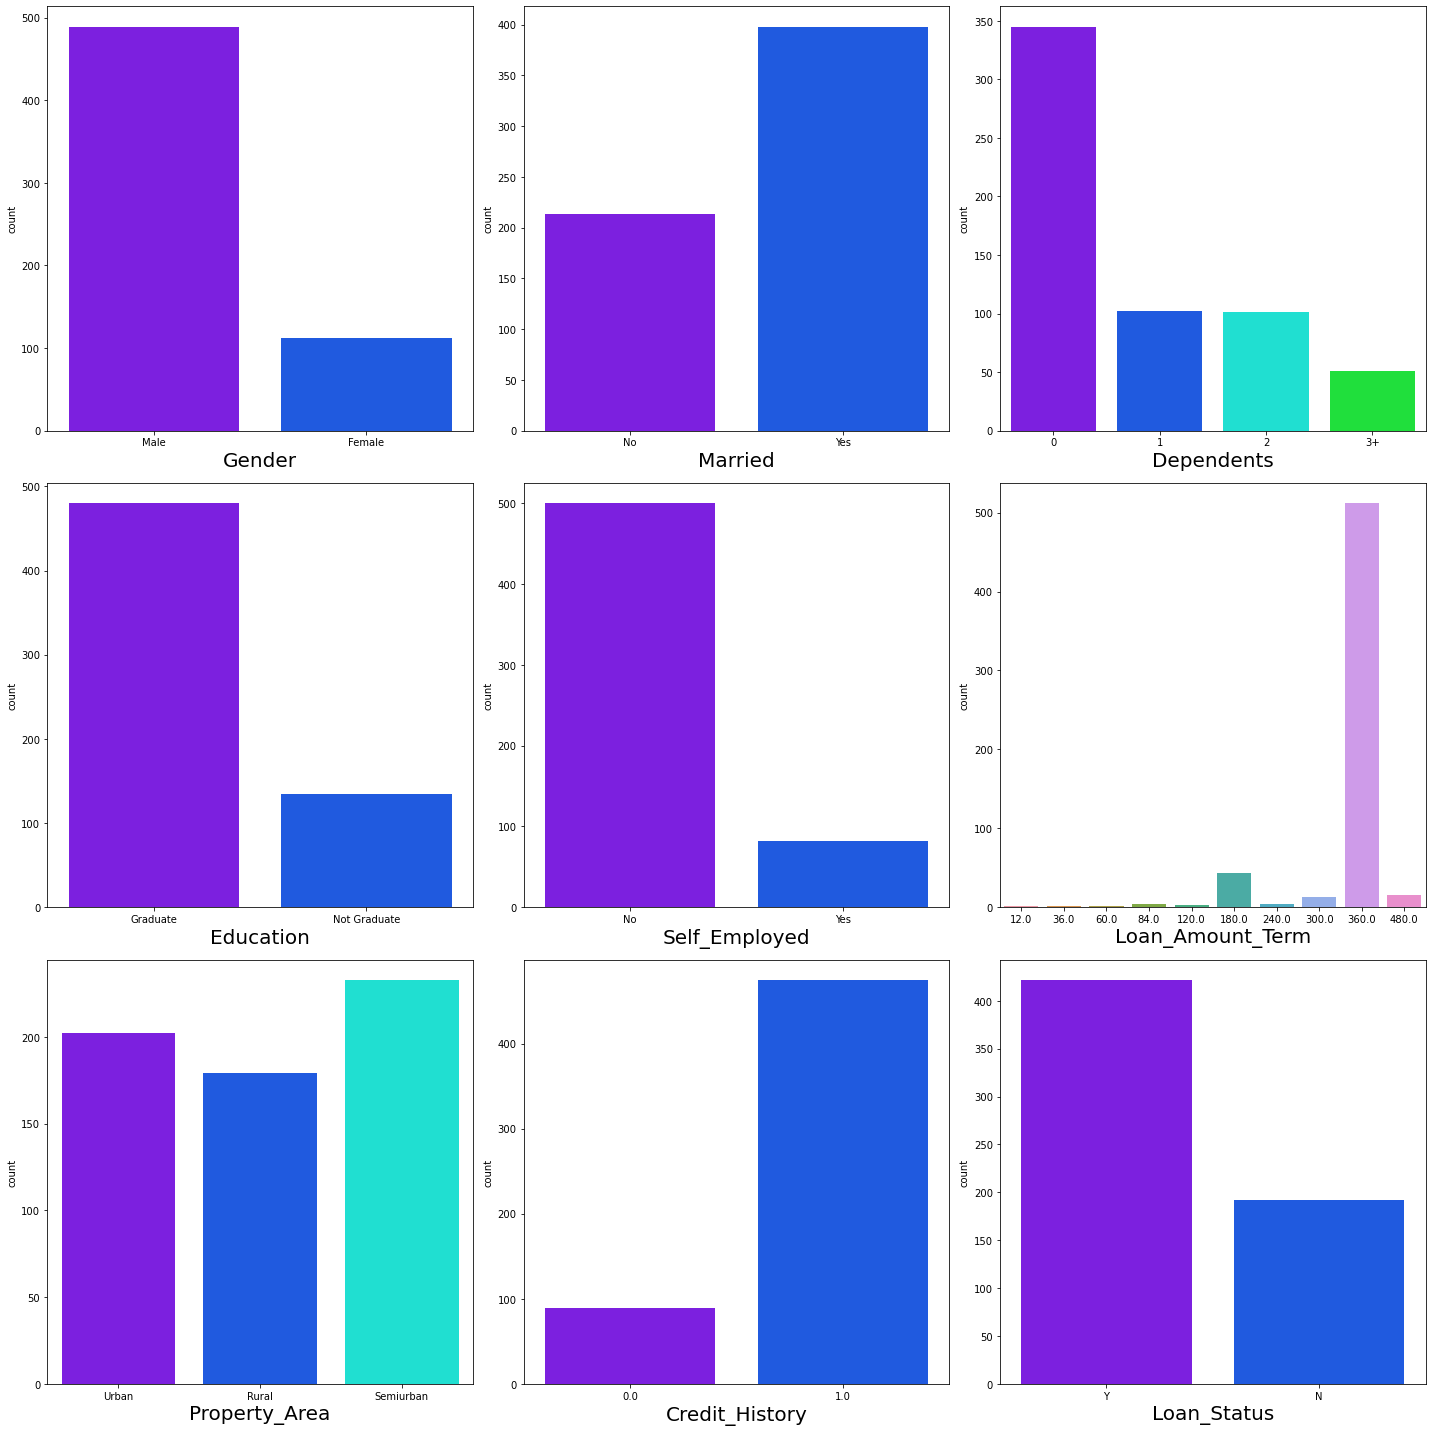

In [13]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- <b> Comment:</b>
     - Out of Total loan application 80 % applicants are Male. <b>We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?</b>
     - Only 20% applicants are self employed. <b> So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.</b>
     - Nearly 70% are married and 75% of loan applicants are graduates
     - Almost 60% of the applicants have no dependents.
     - Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
     - 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
     - Nearly 70 % applicant gets loan approved.
    
<b> We can impute categoical variable with mode in that category. For numerical variable we have option of mean and median. If Outliers are to strech then we will impute with median.</b>
    
### Let check outliers for missing values Numerical variable having missing values by plotting boxplot.

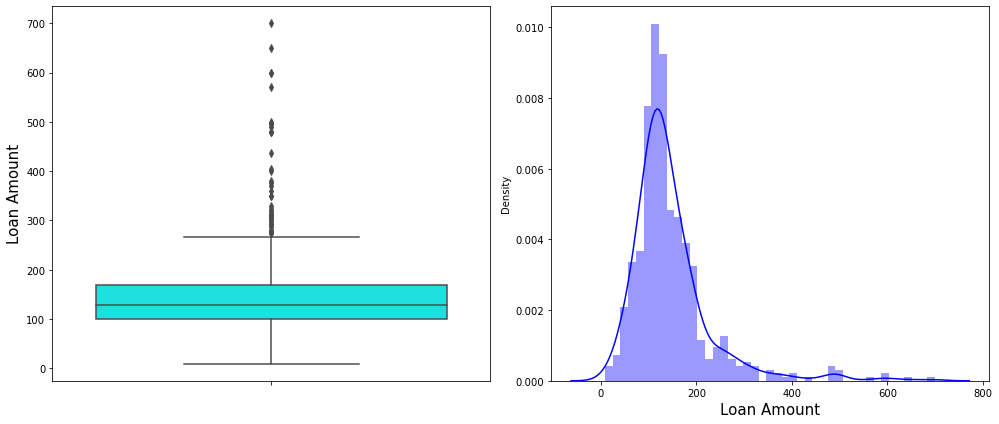

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [15]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


### Comment -
- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

<b> As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in <u>loan amount  with median.</u> </b>

### Imputation of Missing values

In [16]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

#### Imputation details :
1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with mode to 360 months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

## Missing Value Check After Imputation

In [17]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


Comment :
Finally, No Missing Value is Present.

## Statistical Matrix

<AxesSubplot:>

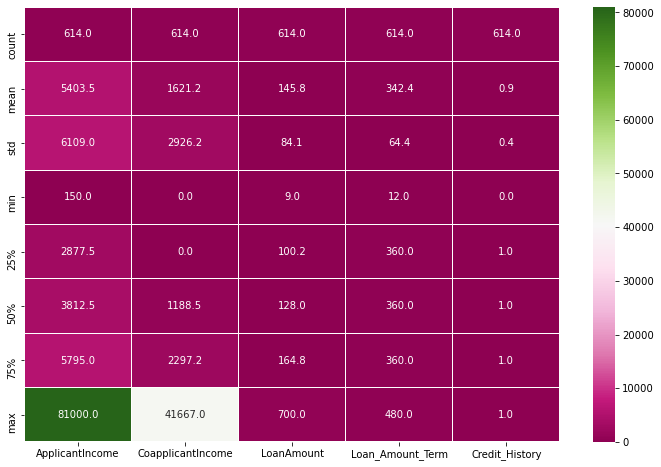

In [18]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Comment:
- In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
- Minimum Applicant income is 150 and maximum is 81000.


## Let's try explore Target and independent feature.

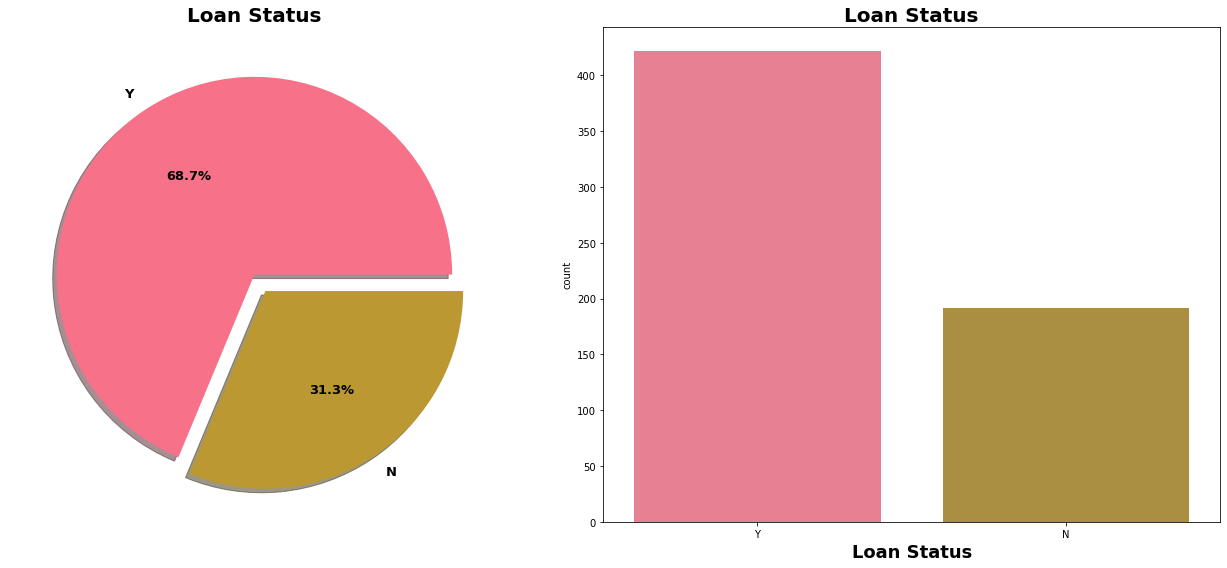

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

#### Comment :
- 68.7% Applicants gets loan Approval.
- We can see that dataset is imbalanced in nature.


<b> Let check each feature against Target variable to gain insight into data. </b>

In [21]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


Comment :
- 81.8% Applicant are male.
- Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval. 
- No Discrimation on name of Gender done.

## Married Vs Loan Status

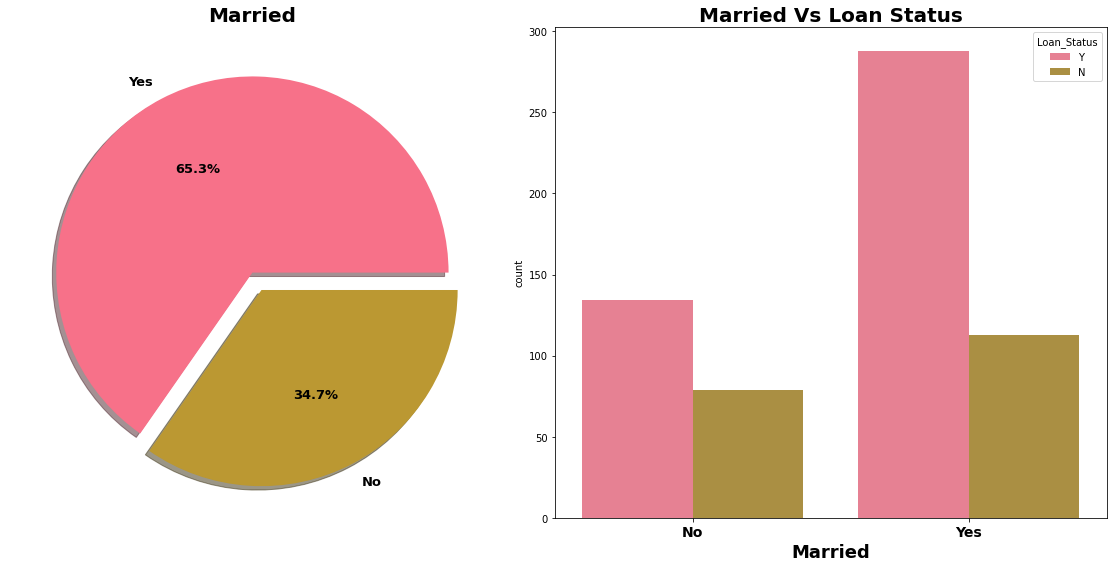

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

### Comment:
- 65.3 % loan applicants are married. We can see from Count plot that <u> Married people have more possibility of getting loan approval.</u>
- <b> But Here comes Interesting observation from crosstab :</b>
    - Unmarried Women are more chances of getting loan approval compare to married women.<b>We will try to find which factor actually play deciding role here like education, employeement or Income.</b>
    - Married Men are more chances of loan approval.
    
### Let check how number dependents play here. 

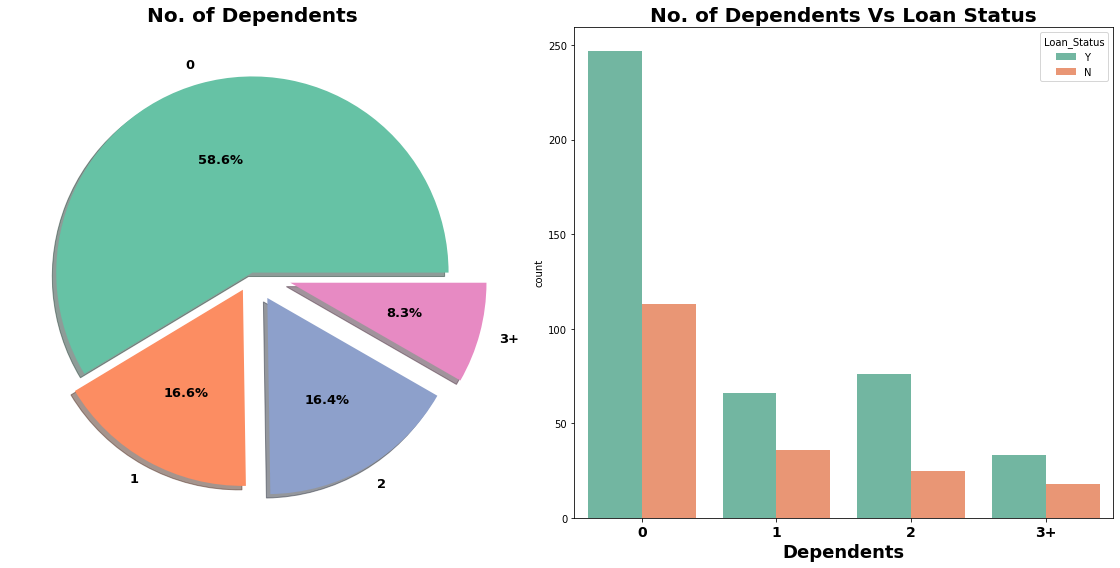

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [25]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [26]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Comment:
- 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents.<b> It will interesting check whether with increase in number dependents their is increase in requirement loan amount.</b>
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

## Education Vs Loan status

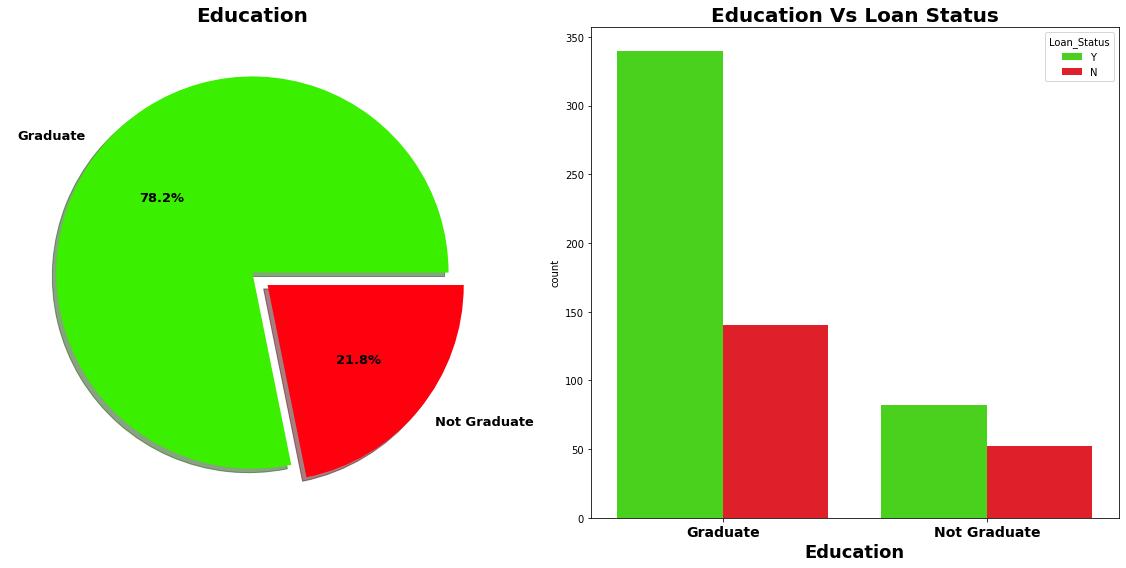

In [27]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [28]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Comment:
- Graduate applicants are more likely to get loan approval irrespective gender.

In [29]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [30]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


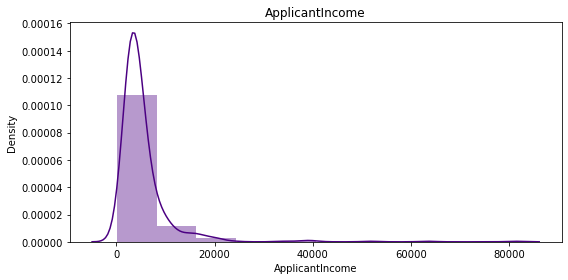

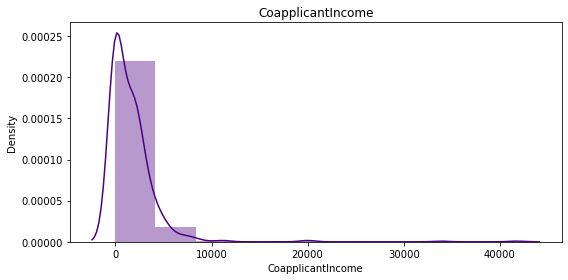

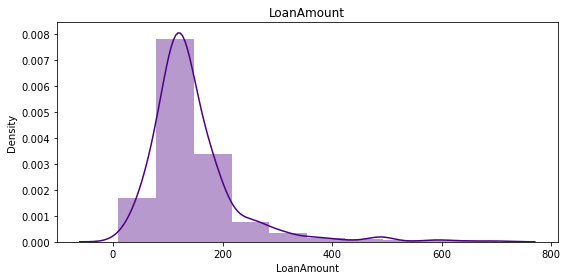

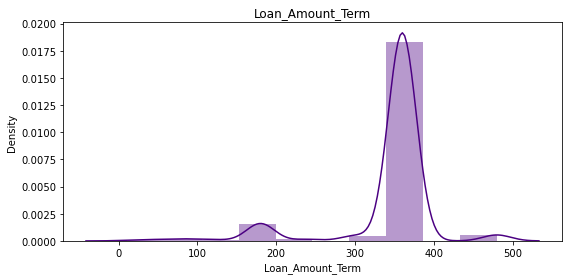

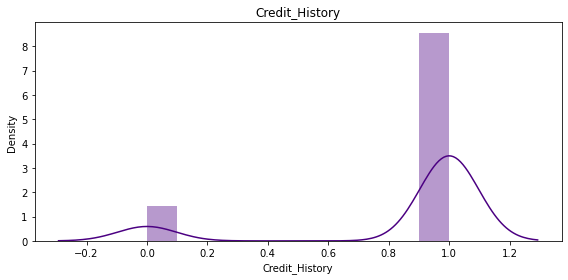

In [31]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

All the numerical columns having skewness.

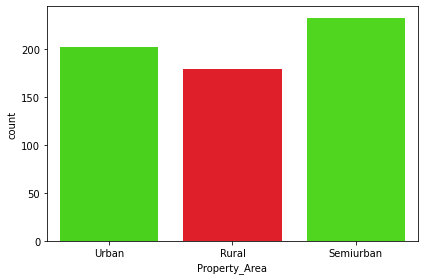

In [32]:
#Count plot for Property_Area
sns.countplot(df['Property_Area']);

Most of the loan applicants are having property in Semiurban are and very less people have property in Rural area

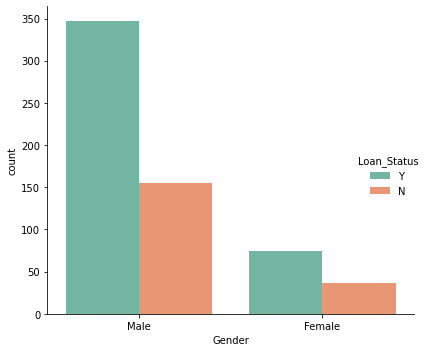

In [33]:
#Factor plot for Gender
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status',palette="Set2")
plt.xticks(rotation=0);

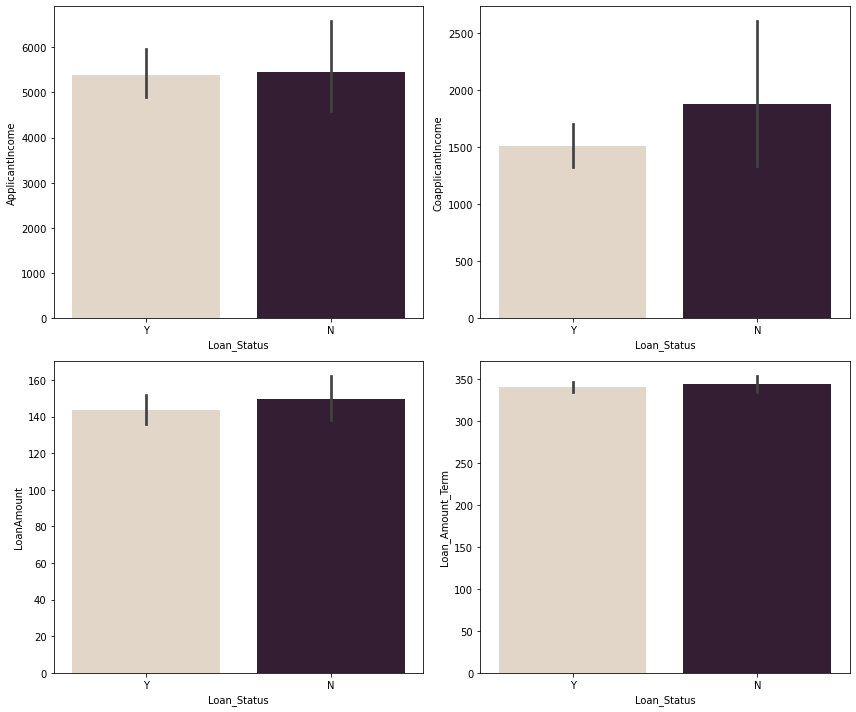

In [34]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Loan_Status with ApplicantIncome
sns.barplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Loan_Status with CoapplicantIncome
sns.barplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Loan_Status with LoanAmount
sns.barplot(x='Loan_Status',y='LoanAmount',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Loan_Status with Loan_Amount_Term
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=df,palette='ch:.25')
plt.show()

Conclusion:

- Based on applicant income the loan status has 50-50 of approval.
- If the coapplicant income is about 2000 then the chance is more of getting loan approved.
- Loan ammount and loan status also has 50% chance of approval.
- For all loan amount term the chance of approval is also same.

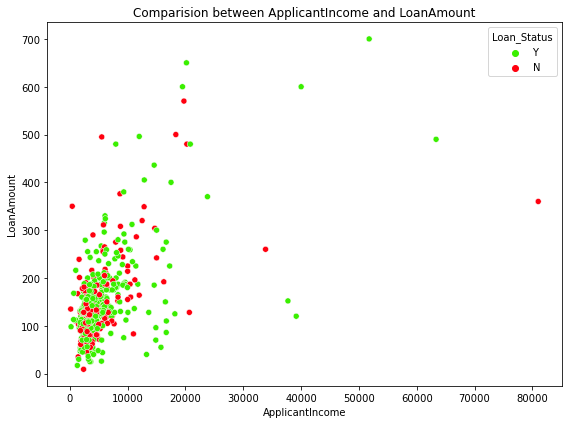

In [35]:
# Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and LoanAmount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status']);

here is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

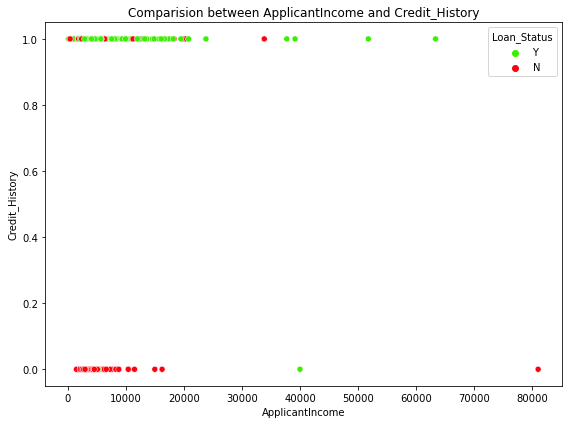

In [36]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between ApplicantIncome and Credit_History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status']);

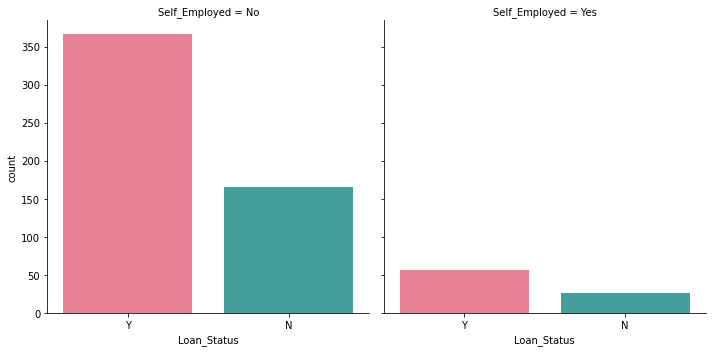

In [37]:
#Comparision between features using cat plot
sns.catplot(x='Loan_Status',col='Self_Employed',data=df,kind='count',palette="husl")

Applicants who are not self employed has more chance of getting loan approved.

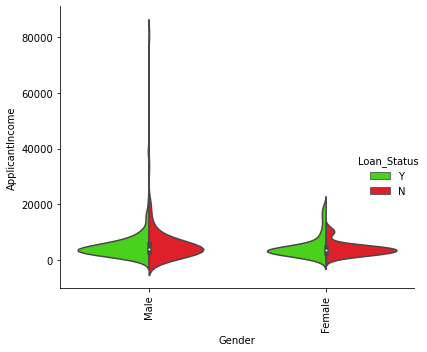

In [38]:
# Let's plot catplot for pair of features
sns.catplot(x = "Gender", y = "ApplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

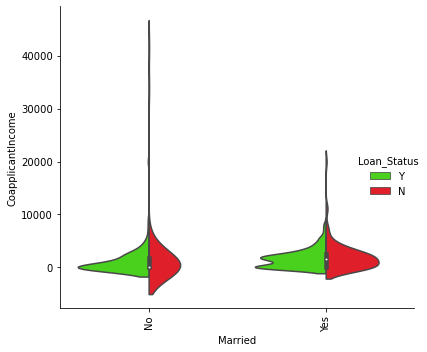

In [39]:
# Let's plot catplot for pair of features
sns.catplot(x = "Married", y = "CoapplicantIncome", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Married people has more chance of getting loan approved.

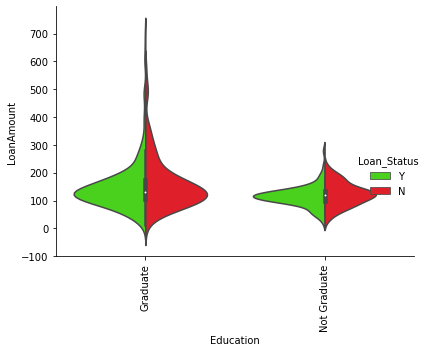

In [40]:
# Let's plot catplot for pair of features
sns.catplot(x = "Education", y = "LoanAmount", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

Graduated people has more chance of getting loan approved

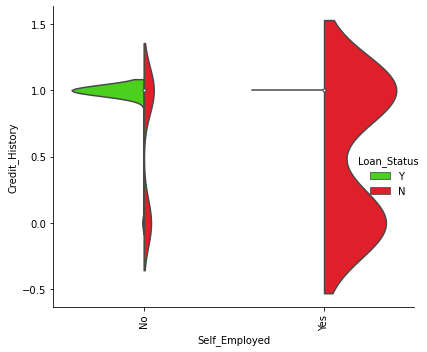

In [41]:
 #Let's plot catplot for pair of features
sns.catplot(x = "Self_Employed", y = "Credit_History", hue = "Loan_Status", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

There is very less chance of getting loan approved for self employed applicant

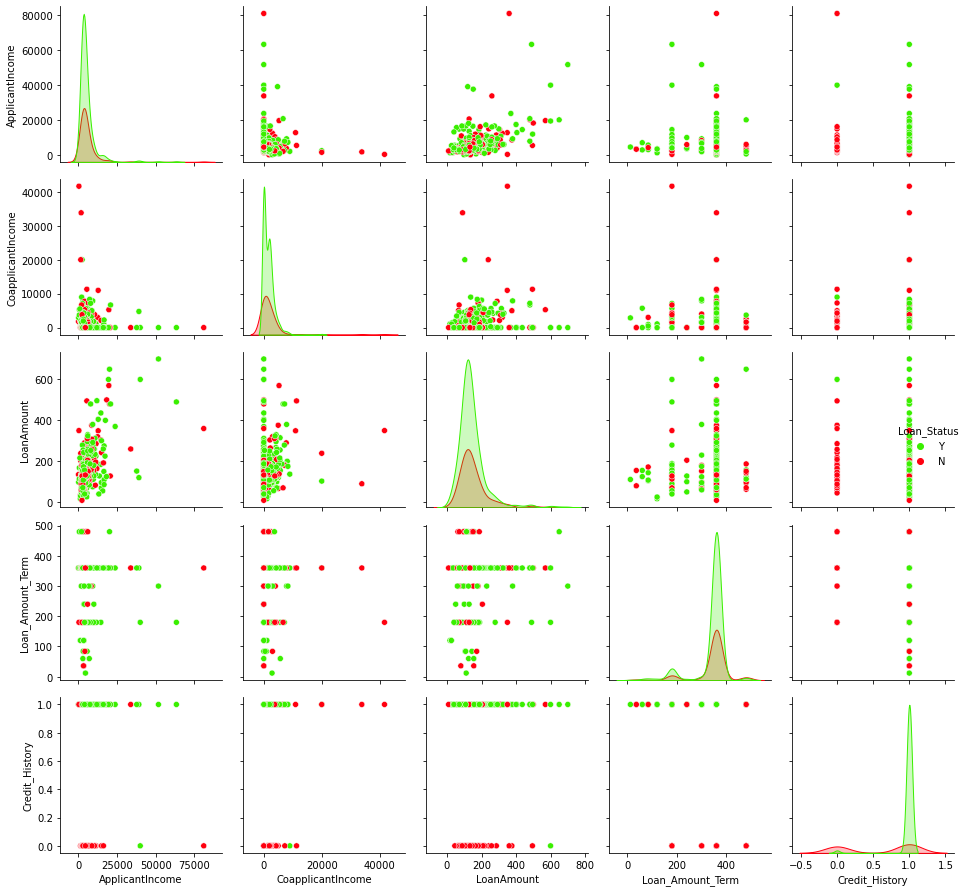

In [42]:
#pair ploting for df
sns.pairplot(df,hue="Loan_Status")

**Above is the pair plot for having Laon_Status as target.There are some extreme outliers present in the datase**

## DATA CLEANING:

### Checking for outliers:

<AxesSubplot:>

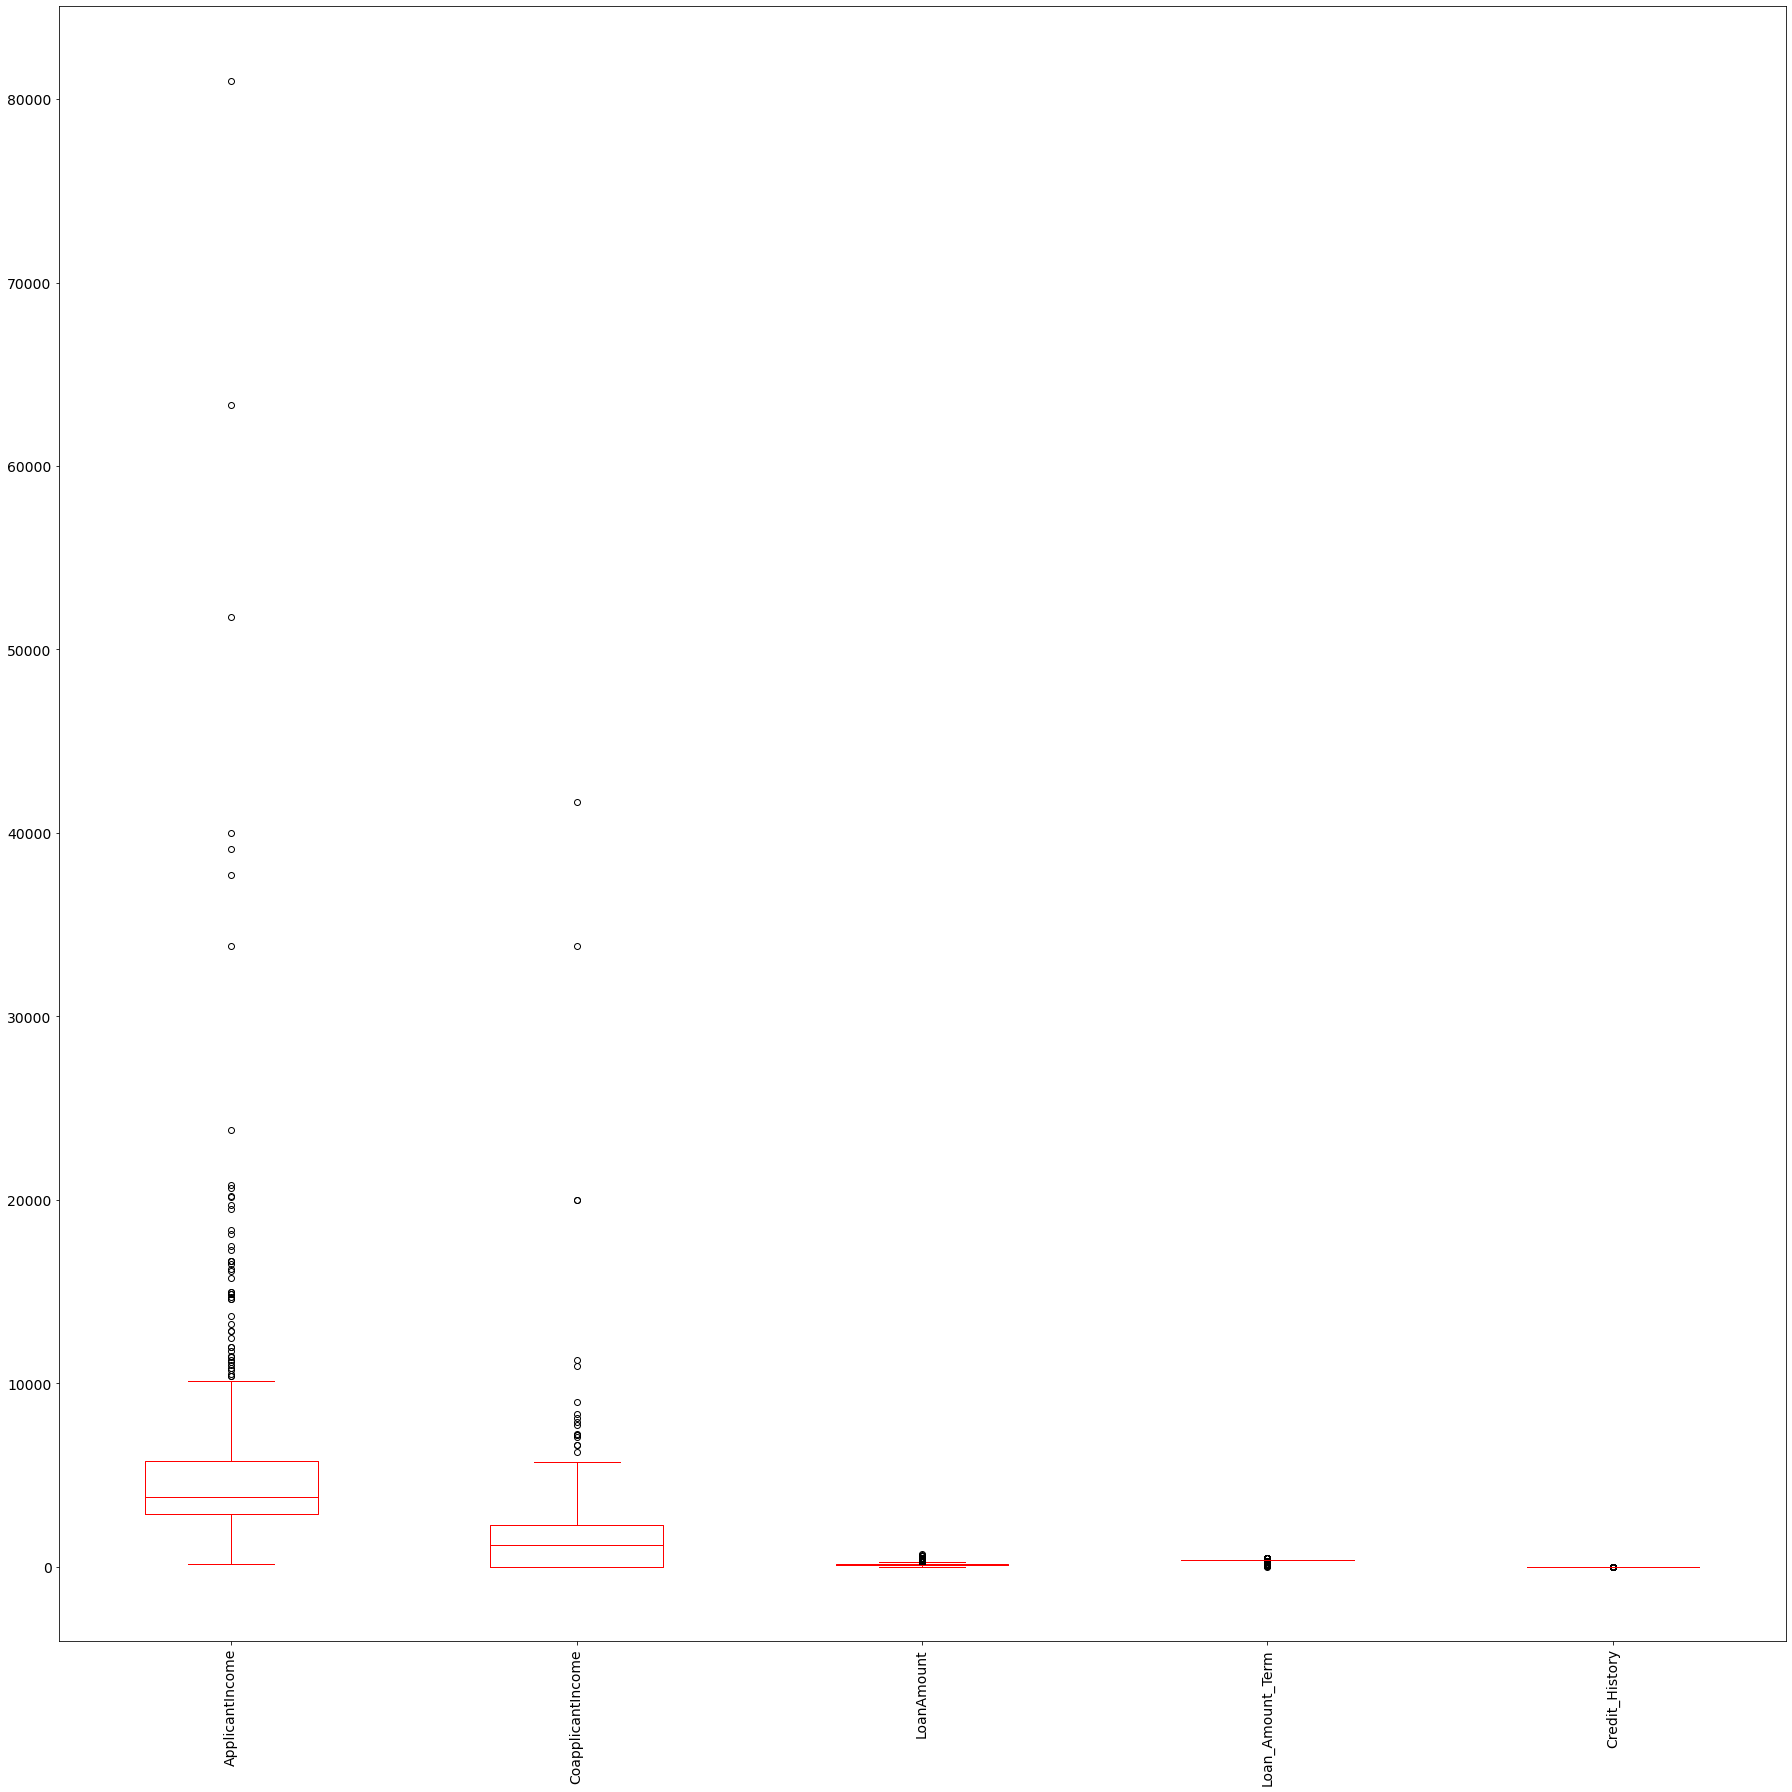

In [43]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

Since Credit_History,Loan_Amount_Term is a Categorical column no need to remove outliers.In all other 4 numerical columns i have to remove outliers.

###  Removing Outliers:

### Using Zscore method:

In [44]:
#Features having outliers
features=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

Above is the list of features which having outliers

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Here we have removed the skewness using zscore method.

In [46]:
#Checking shape of new dataset
df_new.shape

(577, 13)

In [47]:
#Checking shape of old dataset
df.shape

(614, 13)

##### Data Loss

In [48]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

Using Zscore i have 6.03% data loss.Which is less than 10%.

## Checking Skewness

In [49]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

- No need to remove skewness in Credit_History,Loan_Amount_Term since i'm considering it as categorical column.

### Removing skewness using yeo-johnson method:

In [50]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [52]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [53]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
dtype: float64

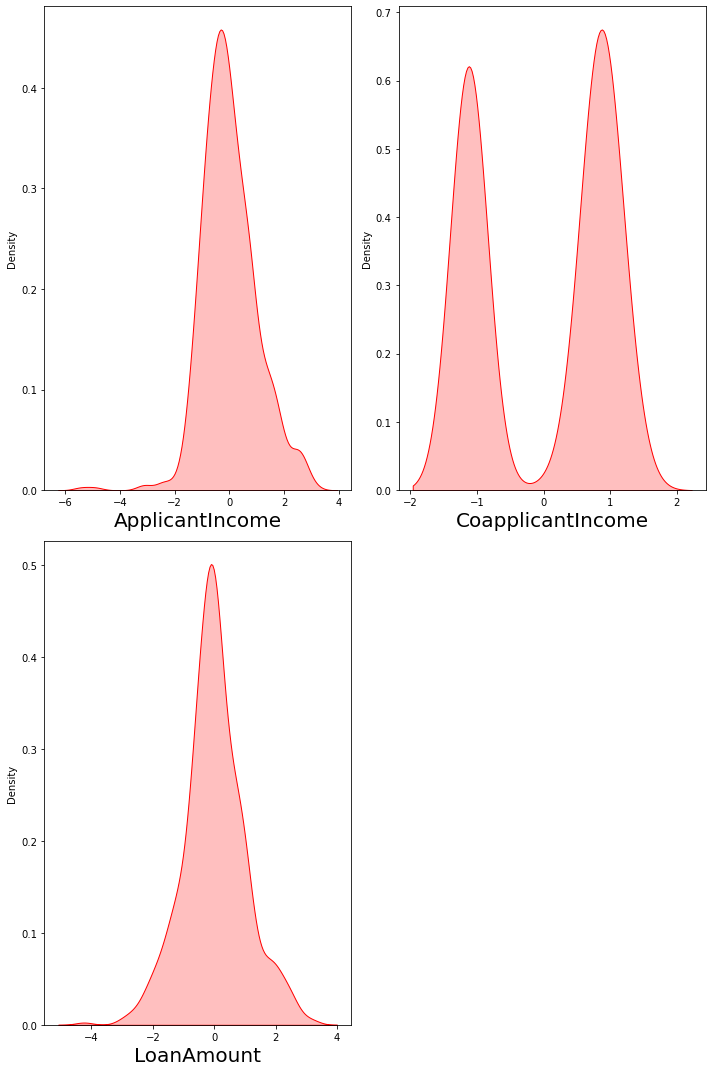

In [54]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Label Encoding:

In [55]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [57]:
df_new[cat_col].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,0,0,0,2,1
1,1,1,1,1,0,0,0,0
2,2,1,1,0,0,1,2,1
3,3,1,1,0,1,0,2,1
4,4,1,0,0,0,0,2,1


## Correlation Matrix

In [58]:
cor=df_new.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.011887,-0.013677,0.059780,0.053923,0.037935,0.023870,-0.034665,0.000299,-0.023393,-0.043065,-0.164261,0.023708
Gender,-0.011887,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,-0.013677,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.059780,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.053923,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,0.037935,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.023870,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,-0.034665,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.000299,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.023393,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291


**Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.**

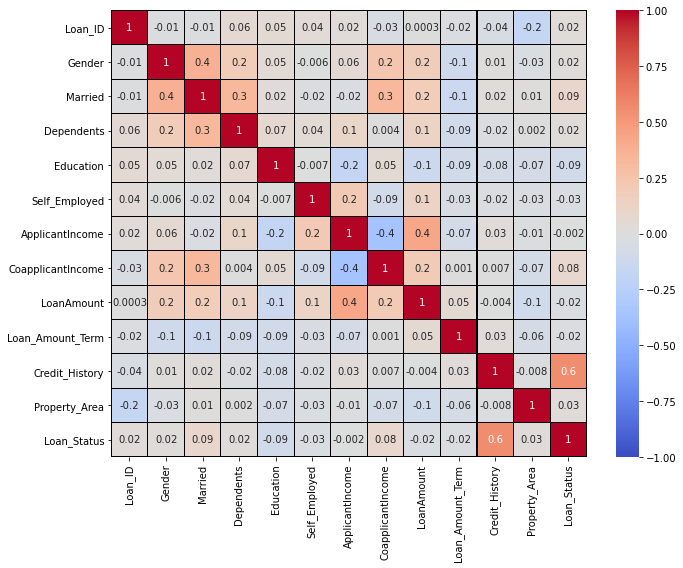

In [59]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

- here is no multicolinearity issue in this dataset.
- we can notice that with target column ApplicantIncome and CoapplicantIncome is very less correlated.
- Let's me plot bar plot of target correlation to get better vission.

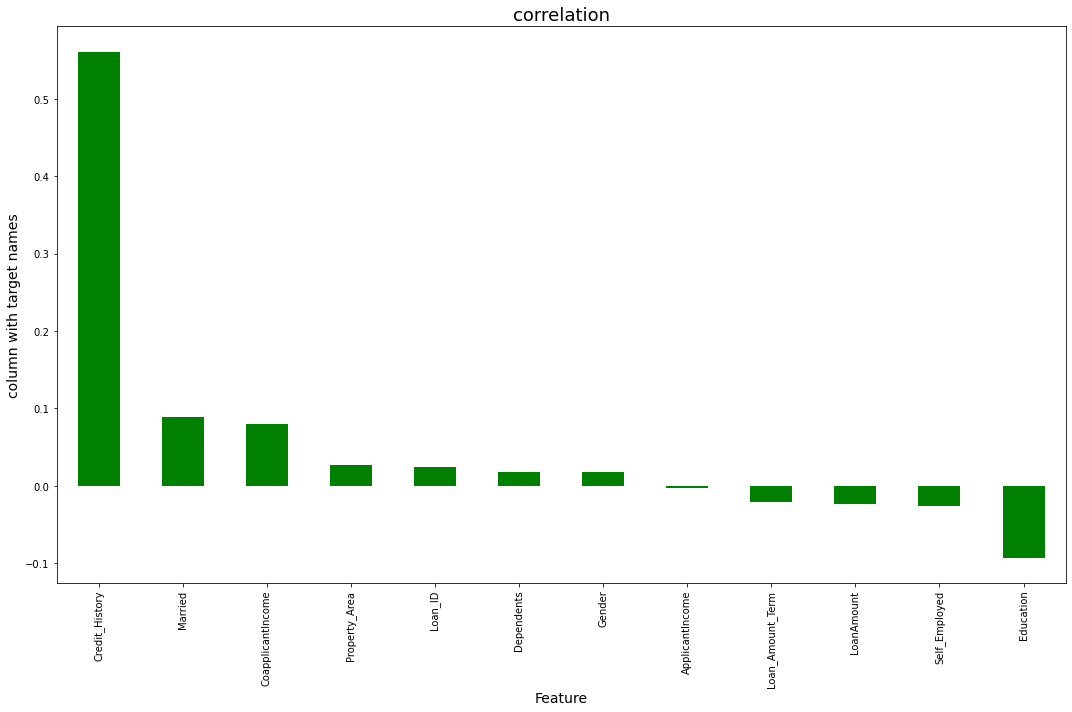

In [60]:
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [61]:
#Droping less correlated column
df_new = df_new.drop(["CoapplicantIncome"],axis=1)

In [62]:
df_new.shape

(577, 12)

In [63]:
#Droping Loan_ID column
df_new = df_new.drop(["Loan_ID"],axis=1)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif['Features']= df_new.columns
vif

,VIF,Features
0,6.008214,Gender
1,3.738846,Married
2,1.756040,Dependents
3,1.355426,Education
4,1.196635,Self_Employed
5,1.333791,ApplicantIncome
6,1.322922,LoanAmount
7,10.152490,Loan_Amount_Term
8,9.462424,Credit_History
9,2.640975,Property_Area


- All features VIF is within permissible limit of 10.

- So No Need to Worry About Multicollinearity.

## Separating features and label

In [65]:
X = df_new.drop("Loan_Status",axis=1)
Y = df_new["Loan_Status"]

In [66]:
X.shape

(577, 10)

In [67]:
Y.shape

(577,)

In [68]:
#Checking the value count of target column
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [69]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(X,Y)

In [70]:
Y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

## Now Scaling the data using standard scaler:

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [72]:
X_scale

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.505490,-1.242228,-0.694012,-0.521119,-0.334263,0.729523,0.008176,0.237395,0.544669,1.233643
1,0.505490,0.805005,0.340508,-0.521119,-0.334263,0.267995,0.008176,0.237395,0.544669,-1.224379
2,0.505490,0.805005,-0.694012,-0.521119,2.991655,-0.518758,-1.446945,0.237395,0.544669,1.233643
3,0.505490,0.805005,-0.694012,1.918946,-0.334263,-0.792136,-0.147966,0.237395,0.544669,1.233643
4,0.505490,-1.242228,-0.694012,-0.521119,-0.334263,0.778120,0.248475,0.237395,0.544669,1.233643
...,...,...,...,...,...,...,...,...,...,...
791,-1.978277,-1.242228,-0.694012,-0.521119,-0.334263,1.767021,1.494038,0.237395,0.544669,-1.224379
792,0.505490,0.805005,-0.694012,-0.521119,-0.334263,0.378030,0.621177,0.237395,0.544669,-1.224379
793,0.505490,0.805005,-0.694012,1.918946,-0.334263,0.042965,-0.974446,0.237395,0.544669,-1.224379
794,0.505490,-1.242228,0.340508,-0.521119,-0.334263,0.102087,-0.403036,0.237395,-0.522093,-1.224379


#### This is the data of independent variables after scaling.

## Balancing the target variable using oversampling:

### Here we have done the data balancing using over sampling technique

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

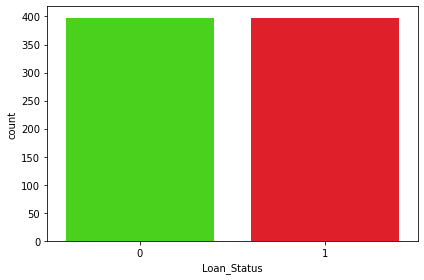

In [73]:
# Visualizing the data after oversampling
sns.countplot(Y)

## Now building  Machine Learning Model

In [74]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Finding best Random state

In [75]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8410041841004184  on Random_state  112


In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=68, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 10)
Training target vector size: (557,)
Test feature matrix size: (239, 10)
Test target vector size: (239,)


## Logistics Regression Model

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=112, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7489539748953975


Confusion matrix of Logistics Regression : 
 [[ 58  51]
 [  9 121]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.87      0.53      0.66       109
           1       0.70      0.93      0.80       130

    accuracy                           0.75       239
   macro avg       0.78      0.73      0.73       239
weighted avg       0.78      0.75      0.74       239



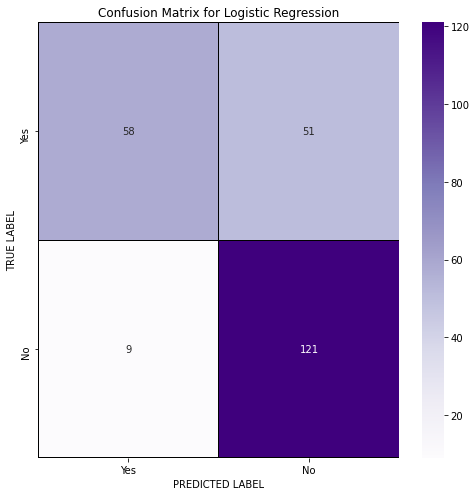

In [97]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [98]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.6875     0.72955975 0.74213836 0.72955975 0.67924528]
Mean CV Score : 0.7136006289308174
Std deviation : 0.02524013463091786


## Decision Tree Classifier

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=112, test_size=.3)
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, y_pred))
print('Confusion Matrix:',confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.7071129707112971
Confusion Matrix: [[78 31]
 [39 91]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       109
           1       0.75      0.70      0.72       130

    accuracy                           0.71       239
   macro avg       0.71      0.71      0.71       239
weighted avg       0.71      0.71      0.71       239



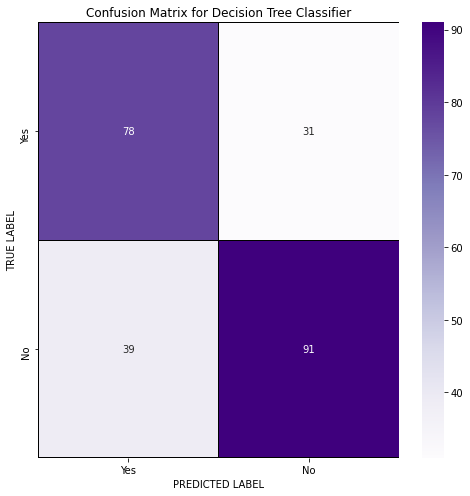

In [100]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [101]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(DTC, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', DTC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.7125     0.71069182 0.75471698 0.75471698 0.79245283]
Mean CV Score : 0.7450157232704402
Std deviation : 0.03057420562763146


## Support Vector Machine

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=112, test_size=.3)
SV=SVC()
SV.fit(X_train,Y_train)
y_pred=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, y_pred))
print('Confusion Matrix:',confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

Accuracy Score: 0.7740585774058577
Confusion Matrix: [[ 71  38]
 [ 16 114]]
              precision    recall  f1-score   support

           0       0.82      0.65      0.72       109
           1       0.75      0.88      0.81       130

    accuracy                           0.77       239
   macro avg       0.78      0.76      0.77       239
weighted avg       0.78      0.77      0.77       239



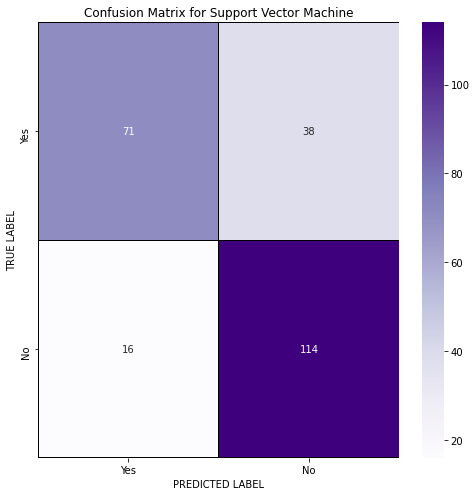

In [103]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

In [104]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(SV, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', SV, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.7125     0.72327044 0.7672956  0.74213836 0.74213836]
Mean CV Score : 0.7374685534591194
Std deviation : 0.018752503359907986


## Finding K value for K-Nearest Neighbors Classifier Model

In [105]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4527923591472056
RMSE value for k=  2 is: 0.49262341019056577
RMSE value for k=  3 is: 0.44345543143056887
RMSE value for k=  4 is: 0.4619406036915484
RMSE value for k=  5 is: 0.4664474480124446
RMSE value for k=  6 is: 0.50104493321917
RMSE value for k=  7 is: 0.5052030537546389
RMSE value for k=  8 is: 0.5052030537546389
RMSE value for k=  9 is: 0.513418276223035
RMSE value for k=  10 is: 0.5255003592910882
RMSE value for k=  11 is: 0.5334030637818674
RMSE value for k=  12 is: 0.5411903817407538
RMSE value for k=  13 is: 0.5488672244956179
RMSE value for k=  14 is: 0.5601852652299533
RMSE value for k=  15 is: 0.5373108307770214
RMSE value for k=  16 is: 0.5601852652299533
RMSE value for k=  17 is: 0.5334030637818674
RMSE value for k=  18 is: 0.5294664560040351
RMSE value for k=  19 is: 0.513418276223035
RMSE value for k=  20 is: 0.5255003592910882
RMSE value for k=  21 is: 0.50104493321917
RMSE value for k=  22 is: 0.4968520148758506
RMSE value for k=  23 i

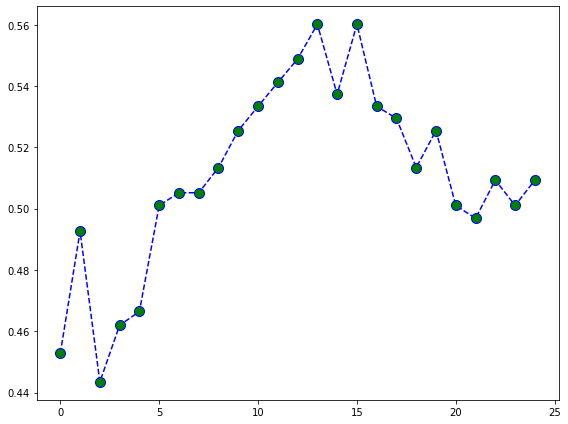

In [106]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

## Comment-
- At k=3, we get the minimum RMSE value which approximately .0.44345543143056887, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

In [107]:
from sklearn.metrics import plot_roc_curve

## K-Nearest Neighbors Classifier Model

In [108]:
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, y_pred))
print('Confusion Matrix:',confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))


Accuracy Score: 0.803347280334728
Confusion Matrix: [[ 90  19]
 [ 28 102]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       109
           1       0.84      0.78      0.81       130

    accuracy                           0.80       239
   macro avg       0.80      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239



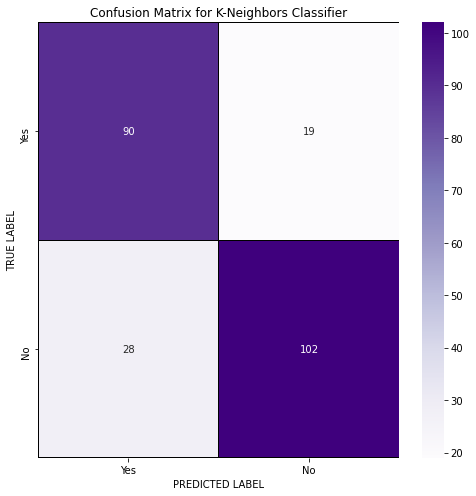

In [109]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbors Classifier')
plt.show()

In [110]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(knn, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', knn, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

CVScore : [0.7375     0.71069182 0.78616352 0.73584906 0.74842767]
Mean CV Score : 0.7437264150943397
Std deviation : 0.024556527059852125


In [111]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Implementing Various Classification Model

Classification ML Algorithm Evaluation Matrix GradientBoostingClassifier() is


Accuracy Score :
 0.7698744769874477


Confusion matrix : 
 [[ 72  37]
 [ 18 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       109
           1       0.75      0.86      0.80       130

    accuracy                           0.77       239
   macro avg       0.78      0.76      0.76       239
weighted avg       0.77      0.77      0.77       239





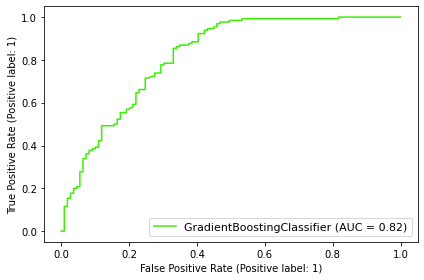

Classification ML Algorithm Evaluation Matrix XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) is


Accuracy Score :
 0.7405857740585774


Confusion matrix : 
 [[83 26]
 [36 94]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73       109
           1       0.78      0.72 

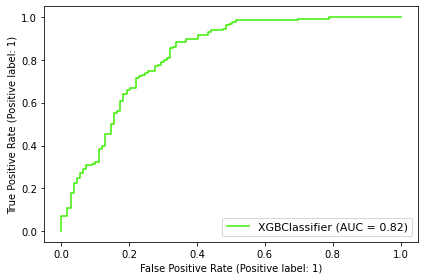

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7322175732217573


Confusion matrix : 
 [[ 52  57]
 [  7 123]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.48      0.62       109
           1       0.68      0.95      0.79       130

    accuracy                           0.73       239
   macro avg       0.78      0.71      0.71       239
weighted avg       0.77      0.73      0.71       239





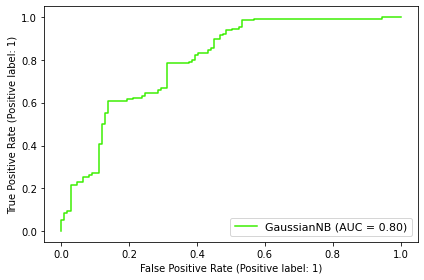

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8284518828451883


Confusion matrix : 
 [[ 86  23]
 [ 18 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.83      0.86      0.85       130

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





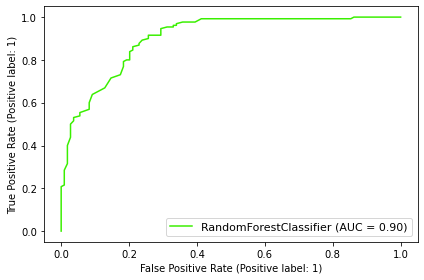

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8493723849372385


Confusion matrix : 
 [[ 91  18]
 [ 18 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       109
           1       0.86      0.86      0.86       130

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239





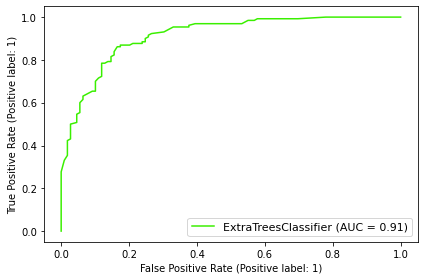

In [112]:
model=[ GradientBoostingClassifier(),
        XGBClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=112, test_size=.3)
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


Classification ML Algorithm Confusion Matrix GradientBoostingClassifier() is


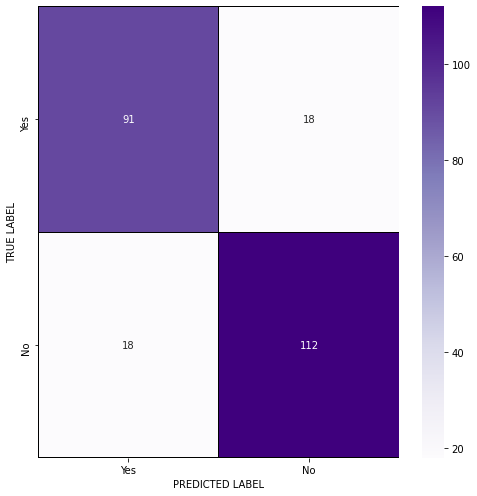

Classification ML Algorithm Confusion Matrix XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) is


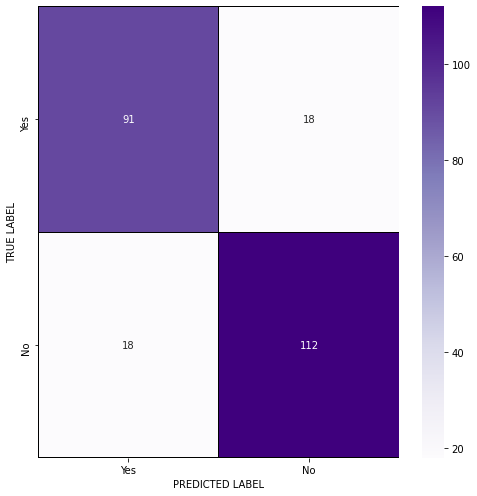

Classification ML Algorithm Confusion Matrix GaussianNB() is


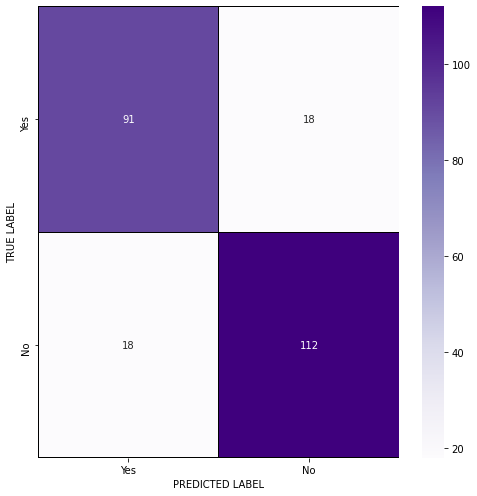

Classification ML Algorithm Confusion Matrix RandomForestClassifier() is


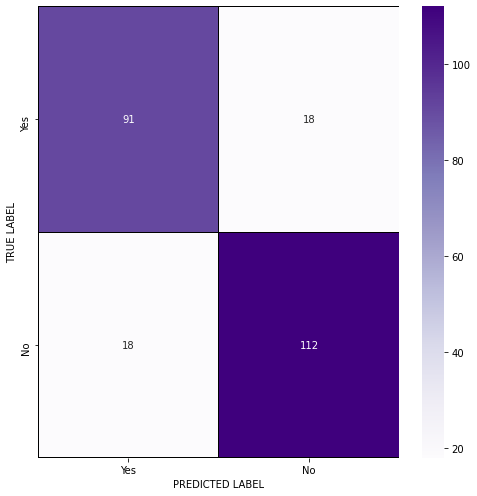

Classification ML Algorithm Confusion Matrix ExtraTreesClassifier() is


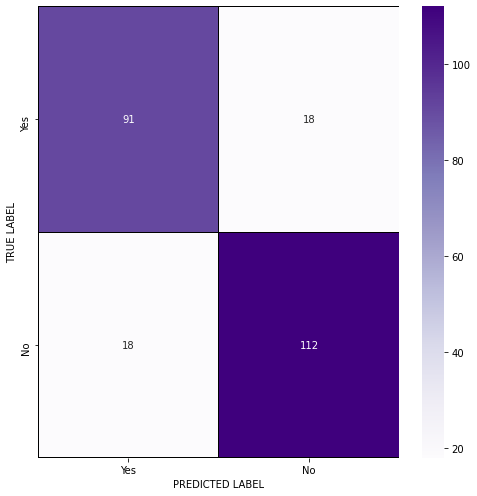

In [113]:
model=[GradientBoostingClassifier(),
        XGBClassifier(),
        GaussianNB(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
for m in model:
    cm = confusion_matrix(Y_test, y_pred)
    x_axis_labels = ["Yes","No"]
    y_axis_labels = ["Yes","No"]
    f, ax = plt.subplots(figsize =(7,7))
    sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.title(print('\033[1m'+'Classification ML Algorithm Confusion Matrix',m,'is' +'\033[0m'))
    plt.show()


In [114]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.6875     0.72955975 0.74213836 0.72955975 0.67924528]
Mean Score : 0.7136006289308174
Std deviation : 0.02524013463091786




Cross Validation Score SVC() :

Score : [0.7125     0.72327044 0.7672956  0.74213836 0.74213836]
Mean Score : 0.7374685534591194
Std deviation : 0.018752503359907986




Cross Validation Score GaussianNB() :

Score : [0.6875     0.71069182 0.77358491 0.74842767 0.71698113]
Mean Score : 0.727437106918239
Std deviation : 0.030182536717853533




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71875    0.70440252 0.7672956  0.75471698 0.79874214]
Mean Score : 0.7487814465408805
Std deviation : 0.033898237020272226




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7375     0.71069182 0.78616352 0.73584906 0.74842767]
Mean Score : 0.7437264150943397
Std deviation : 0.024556527059852125




Cross Validation Score RandomForestClassifier() :

Score : [0.825      0.773584

#### We can see that  Extra Tree Classifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.  we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV

In [117]:
parameter = {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]}

In [119]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.795 total time=   0.1s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.768 total time=   0.1s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.820 total time=   0.1s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.775 total time=   0.1s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [120]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 3,
 'n_estimators': 100}

## FINAL MODEL

In [128]:
FFinal_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 100, max_depth=20 ,min_samples_split= 3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Accuracy Score :
 0.8242677824267782


Confusion matrix of Extra Trees Classifier : 
 [[ 84  25]
 [ 17 113]]


Classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.82      0.87      0.84       130

    accuracy                           0.82       239
   macro avg       0.83      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



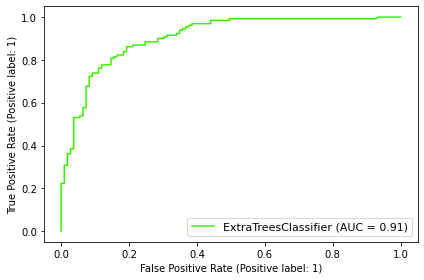

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.819936485532816


In [129]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## saving the Final Model

In [130]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']

 True Values Vs Predicted Value plot :


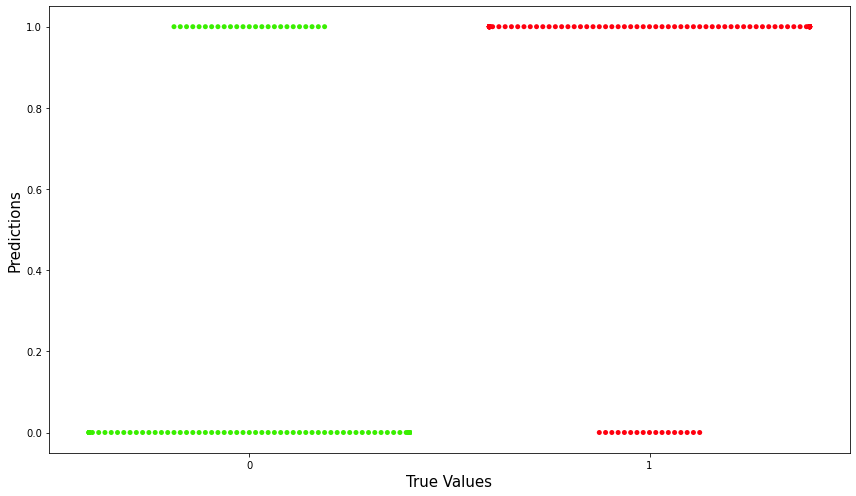

In [131]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Summary of Project Report


**1. I have imported necessary liabries like pandas, numpy , matplotlib to load the dataset and to check some stastical features.**

**2. After loading data set I have checked shape of dataset, data types from which we will able to decide which is our target variable and which features affecting the target features.**

**3. Missing value checked, and missing value filled by using mode function.**

**4. after finding the data types we have distribute the dataset into two features 1. categorical and 2. numerical features, so it helps us to further pre processing on data set.**

**5. after this we have done exploratives data analysis by using various plots(like pie charts, crosstrab, barchart, scatter plot, volin plot etc) base on our target variable /feature.**

**6. Now we have done the feature engineering on dataset by using label encoding.**

**7. after that check the correlation of various feature with target feature and non correlated features we have drop in further steps.**

**8. After checking malticolinearity we have done the PCA, where we got the best 9 features which are highly correlated to our target features.**

**9. Also we have done the data balacing using SMOTE oversampling feature**

**10. afterwards implemented various machine learning model using the best random state of 112, and having the sampling ratio as 70: 30.**

**11. Indentified the final model  base on highest accuracy, F1 score and CV score. Here we got 82.4% accuracy and having very negligible difference in cv score and accuracy score.**

**12. Afterwards deployed hyper parameter tunning on best model using gridsearchCV.**

**13. Afterwards we have save the final model and plotted the AOC and Roc plot on final model.In the final model we got 86.33 accuracy and while ploting AOC and ROC we got the accuracy of 82.42.**


**saved the final model using joblib method in pkl file.**
